# Black Scholes valuation method

Under the Black-Scholes (BS) model, the best method to price a vanilla European option is to use the BS closed formula.

The **BS formula** for a call is:

\begin{equation}
C(t,T,S_t,K,r,σ) = S_t \mathrm N(d_1) - \mathrm K \mathrm e^{r(T-t)} \mathrm N(d_2)
\end{equation}

with :

*   $d_1 = \frac{ln(\frac{S_t}{K}) + (r +\frac{1}{2\sigma ^2})(T-t)}{\sigma \sqrt{T-t}}$
*   $d_2 = d_1 - \sigma \sqrt{T-t}$

where $\mathrm N$ is the cumulative distribution function of a standard normal random variable.

The **BS formula** for a put is :

\begin{equation}
P(t,T,S_t,K,r,σ) = \mathrm K \mathrm e^{r(T-t)} \mathrm N(-d_2) - S_t \mathrm N(-d_1)
\end{equation}

### Proof of Black Scholes Formula

The BS PDE is given by :

\begin{equation}
	\frac{\partial \mathrm V}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm V}{\partial \mathrm S^2}
	+ \mathrm r \mathrm S \frac{\partial \mathrm V}{\partial \mathrm S} - \mathrm r \mathrm V= 0 \\
\end{equation}


We can solve this PDE by using the **Feyman-Kac** methodology which resolve it with a probabilitic method :

\begin{cases}
	\frac{\partial \mathrm V}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm V}{\partial \mathrm S^2}
	+ \mathrm r \mathrm S \frac{\partial \mathrm V}{\partial \mathrm S} - \mathrm r \mathrm V= 0 \\
	F(T, S_{T}) = \mathrm {Payoff}(T,S_{T})
\end{cases}

We know there exists a new probability space $\mathbb Q$ such that :

\begin{equation}
F(t,S_{t}) = e^{-r(T-t)}E^{\mathbb Q}[\mathrm {Payoff}(T,S_{T})]
\end{equation}

where : $dS_{T} = rS_{t}dt + \sigma S_{t}dW^{\mathbb Q}{t}$

Note that this is not the same dynamic as BS $dS_{T} = \mu S_{t}dt + \sigma S_{t}dW^{\mathbb P}{t}$ (under subsjective historical econometry). Now we have a new probability $\mathbb Q \neq \mathbb P$ (called the risk free probability) where the drift is the risk free rate $r \neq \mu$


**to do !!!!!!!!!!!!!!!**



### Let us analyze better the previous formulas for a call

\begin{align*}
C(S_t,K,T) &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ (S_T - K)^+ \bigg| S_t \biggr]  \\
           &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ S_T \mathbb{1}_{S_T >K} \bigg| S_t \biggr] 
              - e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ K \mathbb{1}_{S_T >K} \bigg| S_t \biggr] \\
            &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ S_T \mathbb{1}_{S_T >K} \bigg| S_t \biggr] 
              - e^{-r(T-t)} K \, \underbrace{\mathbb{Q}\biggl[ S_T >K \bigg| S_t \biggr]}_{N(d_2)}
\end{align*}


Let us introduce the following change of measure (under the stock numeraire):

\begin{aligned}
\frac{d \tilde{\mathbb{Q}} }{ d \mathbb{Q} } &= \frac{S_T}{\mathbb{E}^\mathbb{Q}[S_T]} = \frac{S_T}{S_t e^{r(T-t)}}  \\
                                           &= \frac{S_t e^{(r -\frac{1}{2}\sigma^2)(T-t) + \sigma W_{T-t}} }{S_t e^{r(T-t)}} \\
                                           &=   e^{ -\frac{1}{2}\sigma^2(T-t) + \sigma W_{T-t} } \quad \text{(exponential martingale)}
\end{aligned}


By [Girsanov theorem](https://en.wikipedia.org/wiki/Girsanov_theorem), under $\tilde{\mathbb{Q}}$ the driving Brownian motion has the new dynamics

$$\tilde{W_{t}} = W_t - \sigma t $$

and the corresponding stock dynamics becomes

\begin{aligned}
\frac{dS_t}{S_t} &= r dt + \sigma dW_t \\
                 &= (r+\sigma^2) dt + \sigma d\tilde{W}_t
\end{aligned}

The first term is

\begin{aligned}
e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ S_T \mathbb{1}_{S_T >K} \bigg| S_t \biggr] =& e^{-r(T-t)} \mathbb{E}^{\tilde{\mathbb{Q}}}
                 \biggl[ \frac{d \mathbb{Q} }{ d \tilde{\mathbb{Q}}}  S_T \mathbb{1}_{S_T >K} \bigg| S_t \biggr] \\
                     =& e^{-r(T-t)} \mathbb{E}^{\tilde{\mathbb{Q}}} 
                 \biggl[ \frac{e^{r(T-t)}S_t}{S_T}  S_T \mathbb{1}_{S_T >K} \bigg| S_t \biggr] \\
                   =& S_t  \underbrace{\tilde{\mathbb{Q}} ( S_T > K | S_t)}_{N(d_1)}
\end{aligned}

At the end we obtain :

\begin{equation}
C(S_t,K,T) = S_t  \underbrace{\tilde{\mathbb{Q}} ( S_T > K | S_t)}_{N(d_1)} - e^{-r(T-t)} K \, \underbrace{\mathbb{Q}( S_T >K| S_t)}_{N(d_2)}
\end{equation}

\begin{equation}
P(S_t,K,T) =   e^{-r(T-t)} K \, \underbrace{\mathbb{Q}( S_T < K| S_t)}_{N(-d_2)} - S_t\underbrace{\tilde{\mathbb{Q}} ( S_T < K | S_t)}_{N(-d_1)} 
\end{equation}

We have just seen how to interpret the terms $N(d_1)$ and $N(d_2)$. These are the risk neutral probabilities of $S_T > K$ in the stock and money market numeraires respectively.



In [39]:
from scipy.integrate import quad
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')


In [40]:
S0 = 100
K = 101
r = 0.01
sigma = 0.2
T = 2

In [41]:
def BS_price(S0,K,r,sigma, T):
  d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
  d2 = (np.log(S0/K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))

  call = S0 * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
  put = K * np.exp(-r * T) * ss.norm.cdf(-d2 ) - S0 * ss.norm.cdf(-d1 )
  return call,put

call,put = BS_price(S0,K,r,sigma, T)
print("call price = %f" %(call))
print("put price = %f" %(put))

call price = 11.697047
put price = 10.697113


# Numerical integration

$Y \sim \mathrm LN$ to do !!!!!!!!!!!!!!!

The log-normal probability density function is given by 
\begin{equation}
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{- \frac{ \bigl(\log(x) - \mu \bigr)^2}{2\sigma^2}}
\end{equation}

$\mu$ is given by the expected return of the log price under risk neutral probability in the money market measure : 

\begin{equation}
S_T =  e^{ln(S_t)(r - \frac{1}{2}\sigma^{2})(T-t) + \sigma \sqrt{(T-t)}dW_{T-t}}
\end{equation}

\begin{equation}
\mu = ln(S_t)(r - \frac{1}{2}\sigma^{2})(T-t)
\end{equation}

$\sigma$ at time T is given by :

\begin{equation}
\sigma_T = \sigma \sqrt{T}
\end{equation}

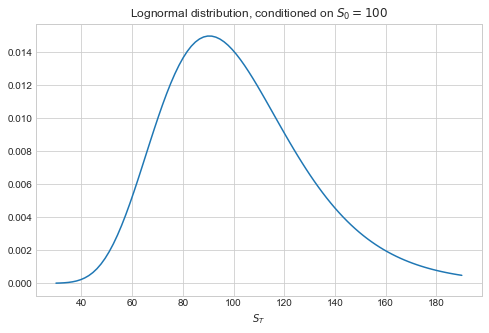

In [42]:
e_ret = np.log(S0) + ( r - 0.5 * sigma**2 ) * T   # expected return of the log-price
vol = sigma * np.sqrt(T)                          # standard deviation of the log-price

def log_normal_pdf(x, vol, e_ret):
    return 1/(x*vol*np.sqrt(2*np.pi)) * np.exp(- (np.log(x) - e_ret)**2 /(2*vol**2) )

plt.figure(figsize=(8,5))
x = np.linspace(30,190, 100)
plt.plot(x, log_normal_pdf(x, vol, e_ret))
plt.title("Lognormal distribution, conditioned on $S_0=100$")
plt.xlabel("$S_T$"); plt.show()

The value of an call option can be also computed as the discounted expectation of a future payoff in this way:

\begin{aligned}
C(S_t,K,T) &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ (S_T - K)^+ \bigg| S_t \biggr] \\
            &= e^{-r(T-t)} \int_{-\infty}^{\infty} (S_T - K)^+ f(S_T|S_t) dS_T   \\
           &= e^{-r(T-t)} \int_K^{\infty} (S_T - K) f(S_T|S_t) dS_T
\end{aligned}

Simiraly, The value of an put option can be also computed as the discounted expectation of a future payoff in this way:

\begin{aligned}
P(S_t,K,T) &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\biggl[ (K - S_T)^+ \bigg| S_t \biggr] \\
            &= e^{-r(T-t)} \int_{-\infty}^{\infty} (K - S_T)^+ f(S_T|S_t) dS_T   \\
           &= e^{-r(T-t)} \int_{0}^{K} (K - S_T) f(S_T|S_t) dS_T
\end{aligned}

where $f(S_T|S_t)$ is the risk neutral transition probability of the process $\{S_u\}_{u\in [t,T]}$. This is a log-normal density function

$$ f(S_T|S_t) = \frac{1}{S_T \sigma \sqrt{2\pi (T-t)}} e^{- \frac{ \biggl[\log(S_T) - \bigl(\\log(S_t) + (r-\frac{1}{2} \sigma^2)(T-t) \bigr) \biggr]^2}{2\sigma^2 (T-t)}} $$


The put option payoff $(K-S_T)^+$ is positive for $S_T < K$ and call option payoff $(S_T - K)^+$ is positive for $S_T > K$
 - In the call case, the integration is from $K$ to $\infty$
 - In the put case, the integration is from $0$ to $K$
 - Stock price $S_T$ can't go under 0

The function `log_normal(x, vol, e_ret)` defined above, corresponds to the scipy.stats function `ss.lognorm.pdf(x, vol, scale=np.exp(e_ret))`

In [43]:
def integrand_LN(S, strike, e_ret, vol, payoff):
    if payoff == "call":
        return (S - strike ) * log_normal_pdf(S, vol, e_ret)
    elif payoff == "put":
        return (strike - S) * log_normal_pdf(S, vol, e_ret)

def integrand_LN_with_SS(S, strike, e_ret, vol, payoff):
    if payoff == "call":
        return (S - strike ) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))
    elif payoff == "put":
        return (strike - S) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))

call = quad(integrand_LN, K, np.inf, args=(K, e_ret, vol, "call") )[0]  * np.exp(-r*T)
put = quad(integrand_LN, 0, K, args=(K, e_ret, vol, "put") )[0]  * np.exp(-r*T)

print("call price = %f" %(call))
print("put price = %f" %(put))

call price = 11.697047
put price = 10.697113


Remind that valuation of option is :

\begin{equation}
C(S_t,K,T) = S_t  \tilde{\mathbb{Q}} ( S_T > K | S_t) - e^{-r(T-t)} K \mathbb{Q}( S_T >K| S_t)
\end{equation}

\begin{equation}
P(S_t,K,T) =   e^{-r(T-t)} K \mathbb{Q}( S_T < K| S_t) - S_t\tilde{\mathbb{Q}} (S_T < K | S_t)
\end{equation}

What if we use the change of measure proposed above?  In this way the integrations are simpler.

Let us compute $\tilde{\mathbb{Q}}( S_T > K )$,  $\mathbb{Q}( S_T > K )$ and $C(S_t,K,T)$ :

In [44]:
e_ret = np.log(S0) + ( r - 0.5 * sigma**2 ) * T   # expected return of the log-price under risk neutral probabilities in stock numeraires measure
e_ret_1 = np.log(S0) + ( r + 0.5 * sigma**2 ) * T  # expected return of the log-price under risk neutral probabilities in money market numeraires measure

Q1 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret_1)), K, np.inf )[0]
print("Risk neutral probability under stock numeraire, Q1 = %f" %(Q1))
Q2 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret)), K, np.inf )[0]
print("Risk neutral probability under money market numeraire, Q2 = %f" %(Q2))
call =  S0 * Q1 - K* np.exp(-r*T) *Q2  
print("BS call price: %f" %(call))

Risk neutral probability under stock numeraire, Q1 = 0.570227
Risk neutral probability under money market numeraire, Q2 = 0.457835
BS call price: 11.697047


Let us compute $\tilde{\mathbb{Q}}( S_T < K )$,  $\mathbb{Q}(  S_T < K )$ and $P(S_t,K,T)$ :

In [45]:
e_ret = np.log(S0) + ( r - 0.5 * sigma**2 ) * T   # expected return of the log-price under risk neutral probabilities in stock numeraires measure
e_ret_1 = np.log(S0) + ( r + 0.5 * sigma**2 ) * T  # expected return of the log-price under risk neutral probabilities in money market numeraires measure

Q1 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret_1)), 0, K)[0]
print("Risk neutral probability under stock numeraire, Q1 = %f" %(Q1))
Q2 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret)), 0, K)[0]
print("Risk neutral probability under money market numeraire, Q2 = %f" %(Q2))
put =  K* np.exp(-r*T) *Q2 - S0 * Q1   
print("BS put price: %f" %(put))

Risk neutral probability under stock numeraire, Q1 = 0.429773
Risk neutral probability under money market numeraire, Q2 = 0.542165
BS put price: 10.697113


It is quite common to compute the Black-Scholes formula using $N(d_1)$ and $N(d_2)$.

The reason is that the cumulative function of the standard Normal distribution is more accessible (I guess). We could use the function `scipy.stats.norm.cdf`

For completeness, let me recall that if $X_T$ is a Normal random variable, then $S_T = S_0 e^{X_T}$ is Log-Normal. Therefore we have:

$$ \mathbb{Q}( S_T > K ) = \mathbb{Q}\biggl( S_0 e^{X_T} > K \biggr) = \mathbb{Q}\biggl( X_T > \log \frac{K}{S_0} \biggr) $$

This permits to use the Normal cumulative function.